In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv('placement-dataset.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [25]:
X = np.array(df[['cgpa', 'iq']])
y = np.array(df['placement'])

In [26]:
X = np.c_[np.ones(X.shape[0]), X]
X[:5]

array([[  1. ,   6.8, 123. ],
       [  1. ,   5.9, 106. ],
       [  1. ,   5.3, 121. ],
       [  1. ,   7.4, 132. ],
       [  1. ,   5.8, 142. ]])

In [27]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [28]:
X.shape

(100, 3)

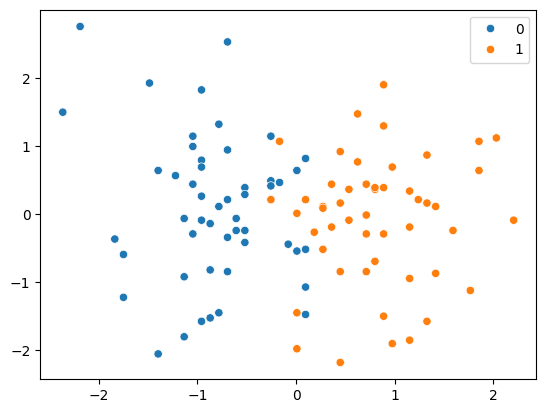

In [29]:
sns.scatterplot(x=X[ : , 1], y=X[ : , 2], hue = y)
plt.show()

# Gradients based on probabilities 

In [30]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [31]:
def logistic_loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [32]:
def gradient_descent(X, y, theta, alpha=0.3, epochs=1000):
    m = X.shape[0] 
    for _ in range(epochs):
        z = np.dot(X, theta)  
        h = sigmoid(z) 
        gradient = np.dot(X.T, (h - y)) / m  
        theta -= alpha * gradient  

    return theta[0], theta[1 : ]

In [33]:
theta = np.ones(X.shape[1])
bias, weights = gradient_descent(X, y, theta)
bias, weights

(1.0, array([6.11871576, 0.06144923]))

In [34]:
m = - (weights[0] / weights[1])
b = - (bias / weights[1])

In [35]:
x_input = X[ : , 1 : ]
y_input = m*x_input + b

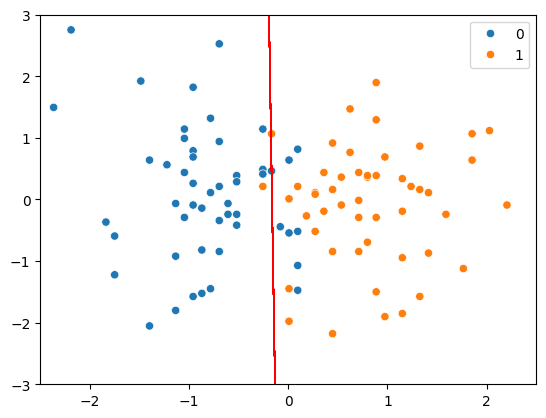

In [36]:
plt.plot(x_input, y_input, color="red", linewidth = 0.8)
sns.scatterplot(x=X[ : , 1], y=X[ : , 2], hue = y)
plt.ylim(-3,3)
plt.xlim(-2.5, 2.5)
plt.show()